In [6]:
from const import *
import matplotlib.pyplot as plt

In [7]:
MAX_48_BIT_INTEGER = 2**48 - 1

In [8]:
def generate48BitInputFromNumber(number):
    binaryRepresentation = bin(number)[2:]
    if len(binaryRepresentation) > 48:
        print('Numer is too big!')
        return ''
    while len(binaryRepresentation) < 48:
        binaryRepresentation = "0" + binaryRepresentation
    return binaryRepresentation

In [9]:
def intTo16BitBinary(number: int):
    if number >= 2**4 or number < 0:
        print('wrong number passed to intTo16BitBinary function')
        return ''
    binRepresentation = bin(number)[2:]
    while len(binRepresentation) < 4:
        binRepresentation = '0' + binRepresentation
    return binRepresentation

In [10]:
def sBoxOperation(sBox, binaryInput):
    if len(binaryInput) != 48:
        print("Wrong output length for sBoxOperation")
        return
    result = ""
    for i in range(0, len(binaryInput), 6):
        block = binaryInput[i : i + 6]
        row = int(block[0] + block[-1], 2)
        column = int(block[1:5], 2)
        output = str(sBox[row][column])
        result += intTo16BitBinary(sBox[row][column])
    return int(result, 2)

In [11]:
def main():
    data = []
    index = int(input('Introduce el indice de la S-Box a probar (0-7): '))
    if index < 0 or index > 7:
        print('Input invalido')
        return
    for i in range(1000):
        inputBits = generate48BitInputFromNumber(i)
        output = sBoxOperation(S_BOXES[index], inputBits)
        data.append(output)
    plt.plot(data)
    plt.xlabel('decimal input')
    plt.ylabel('decimal output')
    plt.title(f'Non-linearity of S-box {index} in des')
    plt.show()

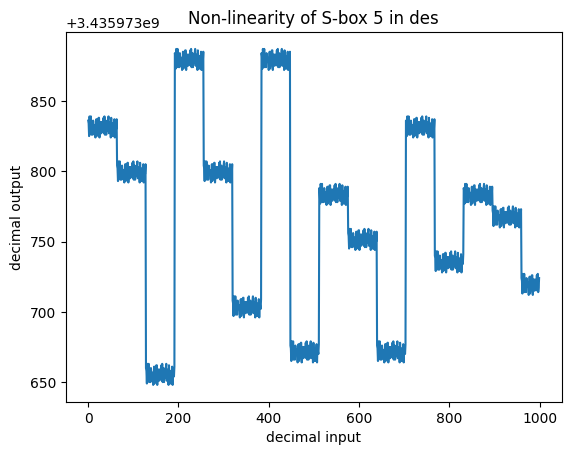

In [12]:
if __name__ == "__main__":
    main()

In [13]:
!python3 nonLinearity.py

Introduce el indice de la S-Box a probar (0-7): ^C
Traceback (most recent call last):
  File "/home/chenko/Desktop/uni-crypto/P2/des/nonLinearity.py", line 68, in <module>
    main()
  File "/home/chenko/Desktop/uni-crypto/P2/des/nonLinearity.py", line 48, in main
    index = int(input('Introduce el indice de la S-Box a probar (0-7): '))
KeyboardInterrupt
